In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[-0.15268609, -0.24506544,  0.13475433, -0.62429904, -0.66200823,
        -0.17594531,  0.40797361,  0.60993615, -0.76723201,  0.25238884],
       [ 0.66124108,  0.34516956,  1.37876012, -1.09309603, -1.07464843,
        -0.80464239,  1.1769842 ,  0.84473356, -0.97459184,  1.53498255]])

In [4]:
test_Features[:2]

array([[-0.69872851, -0.50504096, -0.69133831,  0.66338837,  1.23197412,
         0.00301574, -0.59805835,  0.43463395,  0.35985584, -0.85546873],
       [-0.60035429, -0.33431313, -0.86421681,  0.37182619,  0.60577451,
        -0.48025154, -0.57931869, -0.58588321,  0.95296924, -0.66591924]])

In [5]:
train_Label[:4]

array([1, 1, 1, 0])

In [6]:
train_Features.shape

(15216, 10)

In [7]:
test_Label[:4]

array([1, 1, 0, 1])

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=30*7,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=30*6, 
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=30*5, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=30*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=30*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=30*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [17]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 210)               2310      
_________________________________________________________________
dense_2 (Dense)              (None, 180)               37980     
_________________________________________________________________
dense_3 (Dense)              (None, 150)               27150     
_________________________________________________________________
dense_4 (Dense)              (None, 120)               18120     
_________________________________________________________________
dense_5 (Dense)              (None, 90)                10890     
_________________________________________________________________
dense_6 (Dense)              (None, 60)                5460      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                1830      
__________

In [19]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [20]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 3s - loss: 0.6852 - acc: 0.6406 - val_loss: 0.6396 - val_acc: 0.6399
Epoch 2/30
 - 1s - loss: 0.4851 - acc: 0.7527 - val_loss: 0.3922 - val_acc: 0.8219
Epoch 3/30
 - 1s - loss: 0.3796 - acc: 0.8398 - val_loss: 0.3579 - val_acc: 0.8449
Epoch 4/30
 - 1s - loss: 0.3655 - acc: 0.8494 - val_loss: 0.3338 - val_acc: 0.8647
Epoch 5/30
 - 1s - loss: 0.3436 - acc: 0.8610 - val_loss: 0.3231 - val_acc: 0.8699
Epoch 6/30
 - 1s - loss: 0.3328 - acc: 0.8659 - val_loss: 0.3137 - val_acc: 0.8725
Epoch 7/30
 - 1s - loss: 0.3280 - acc: 0.8621 - val_loss: 0.3163 - val_acc: 0.8647
Epoch 8/30
 - 1s - loss: 0.3226 - acc: 0.8665 - val_loss: 0.3185 - val_acc: 0.8699
Epoch 9/30
 - 1s - loss: 0.3181 - acc: 0.8676 - val_loss: 0.3174 - val_acc: 0.8653


In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

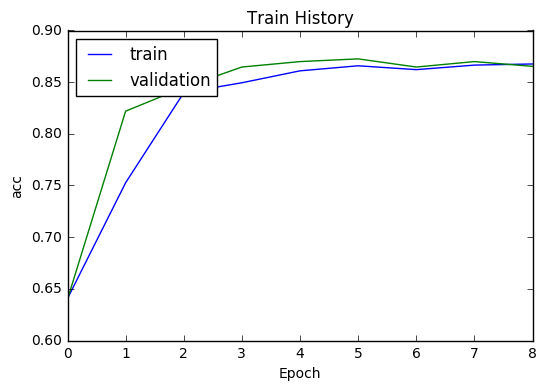

In [22]:
show_train_history(train_history,'acc','val_acc')

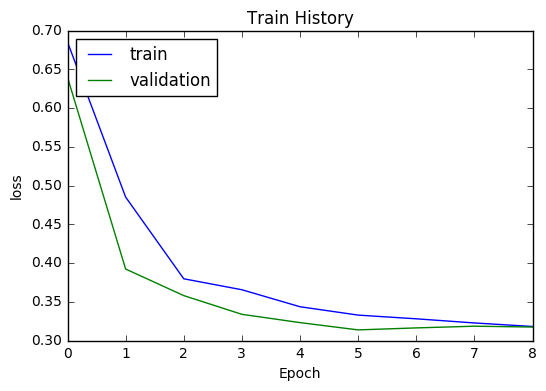

In [23]:
show_train_history(train_history,'loss','val_loss')

In [24]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 0s 129us/step


In [25]:
scores[1]

0.8656677183167291